In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('./hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.shape

(5000, 3)

该数据集，对5000名参与者进行了一项实验，以研究年龄和身体健康对听力损失的影响，尤其是听高音的能力。此数据显示了研究结果对参与者进行了身体能力的评估和评分，然后必须进行音频测试（通过/不通过），以评估他们听到高频的能力。

- 特征：1. 年龄 2. 健康得分
- 标签：（1通过/0不通过）

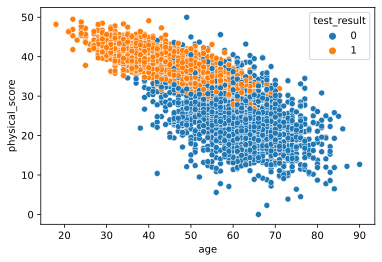

In [3]:
# 散点图
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result');

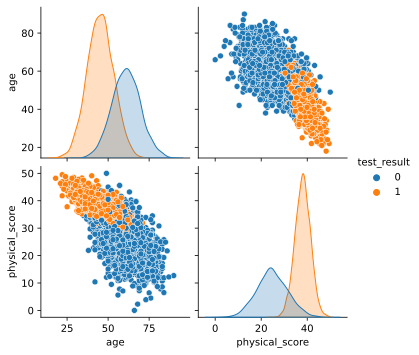

In [5]:
# 特征两两之间的对应关系
sns.pairplot(df,hue='test_result');

## 训练模型

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # LR
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

#准备数据
X = df.drop('test_result',axis=1)
y = df['test_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#定义模型
log_model = LogisticRegression()

#训练模型
log_model.fit(scaled_X_train,y_train)

#预测数据
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.922

## 模型性能评估：准确率、精确度、召回率

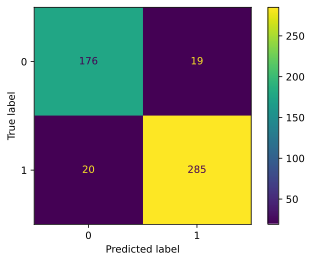

In [9]:
# 绘制混淆矩阵
plot_confusion_matrix(log_model,scaled_X_test,y_test);

我们对以上矩阵进行定义如下：

- 真正类TP(True Positive) ：预测为正，实际结果为正。如，上图右下角285。
- 真负类TN(True Negative) ：预测为负，实际结果为负。如，上图左上角176。
- 假正类FP(False Positive) ：预测为正，实际结果为负。如，上图右上角19。
- 假负类FN(False Negative) ：预测为负，实际结果为正。如，上图左下角20。


1. 准确率(Accuracy) 
$$
\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}
$$
2. 精确度(Precision) 
$$
\text{Precision} = \frac{TP}{TP+FP}
$$
3. 召回率(Recall) 
$$
\text{Recall} = \frac{TP}{TP+FN}
$$

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       195
           1       0.94      0.93      0.94       305

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



## Softmax 多分类

Softmax 回归模型首先计算出每个类的分数，然后对这些分数应用 softmax 函数，估计每个类的概率。我们预测具有最高估计概率的类，简单来说就是找得分最高的类。

In [11]:
df = pd.read_csv('./iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


该数据集，包含150个鸢尾花样本数据，数据特征包含花瓣的长度和宽度和萼片的长度和宽度，包含三个属种的鸢尾花，分别是山鸢尾(setosa)、变色鸢尾(versicolor)和维吉尼亚鸢尾(virginica)。

- 特征：1. 花萼长度 2. 花萼宽度 3. 花瓣长度 4 花萼宽度
- 标签：种类：山鸢尾(setosa)、变色鸢尾(versicolor)和维吉尼亚鸢尾(virginica)

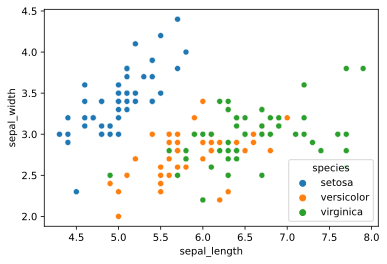

In [12]:
# 散点图
# 花萼长度和宽度
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species');

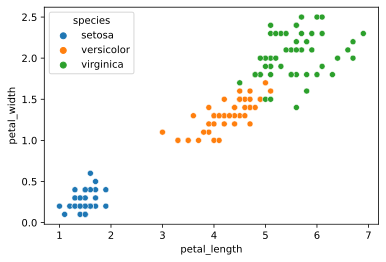

In [13]:
# 散点图
# 花瓣长度和宽度
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species');

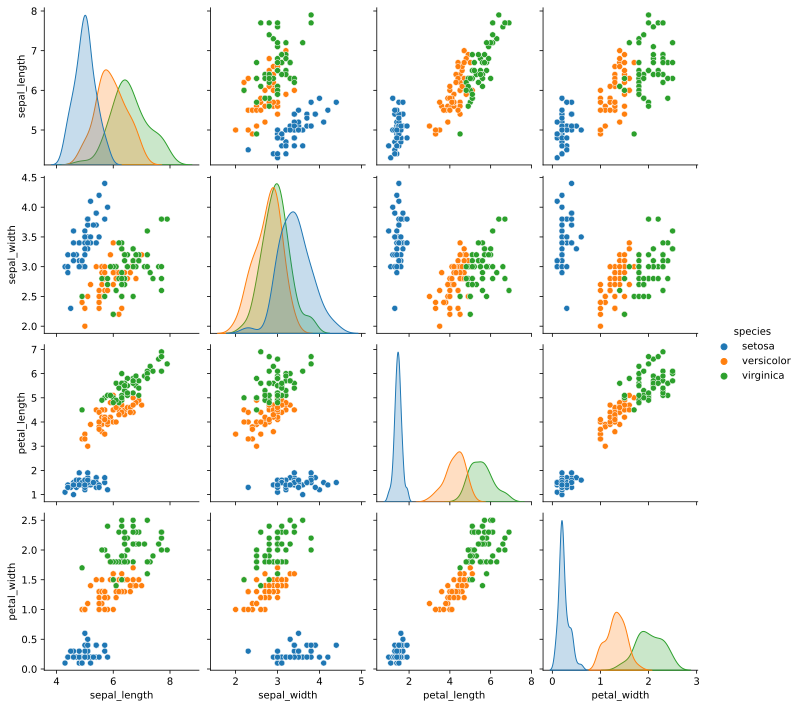

In [14]:
# 特征两两之间的对应关系
sns.pairplot(df,hue='species');

## 训练模型

In [15]:
#准备数据
X = df.drop('species',axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#定义模型 多元逻辑回归模型
softmax_model = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=50)

#训练模型
softmax_model.fit(scaled_X_train,y_train)

#预测数据
y_pred = softmax_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.9210526315789473

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.80      0.89        15
   virginica       0.80      1.00      0.89        12

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.94      0.92      0.92        38



## 绘制花瓣分类 

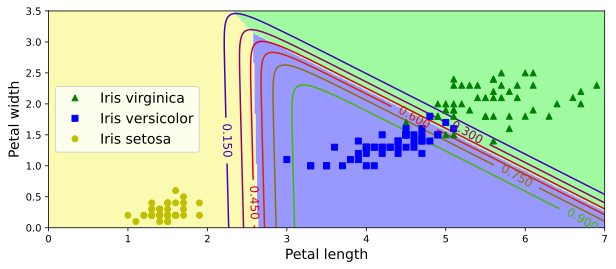

In [17]:
#提取特征
X = df[['petal_length','petal_width']].to_numpy() 
y = df["species"].factorize(['setosa', 'versicolor','virginica'])[0]

#定义模型
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=50)

#训练模型
softmax_reg.fit(X, y)

#随机测试数据
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

#预测
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

#绘制图像
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()